In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
#!pip install imbalanced-learn
!pip3 install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
import imblearn


In [2]:
lending_df = pd.read_csv("dropna_lending_tree.csv")

lending_df

,Unnamed: 0,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,3,6025.0,36 months,10.91,197.00,10+ years,RENT,52000.0,Not Verified,Fully Paid,...,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,Cash
1,4,25000.0,60 months,26.30,752.96,10+ years,OWN,65000.0,Verified,Current,...,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,Cash
2,5,20000.0,36 months,9.49,640.57,10+ years,MORTGAGE,100000.0,Not Verified,Fully Paid,...,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,Cash
3,7,24575.0,60 months,14.49,578.08,5 years,RENT,120000.0,Source Verified,Fully Paid,...,3.0,95.2,80.0,0.0,0.0,70820.0,54296.0,17300.0,47920.0,Cash
4,8,7000.0,36 months,6.99,216.11,5 years,RENT,41000.0,Source Verified,Fully Paid,...,4.0,100.0,0.0,0.0,0.0,63017.0,23503.0,27600.0,23217.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,56510,4000.0,36 months,15.02,138.71,10+ years,OWN,72000.0,Verified,Current,...,1.0,100.0,60.0,1.0,0.0,47931.0,22213.0,20100.0,26131.0,Cash
23286,56511,2200.0,36 months,7.21,68.15,9 years,MORTGAGE,40000.0,Verified,Current,...,0.0,100.0,100.0,0.0,0.0,94398.0,14135.0,9800.0,9750.0,Cash
23287,56513,21000.0,36 months,22.91,811.92,2 years,OWN,48000.0,Source Verified,Current,...,1.0,100.0,61.5,0.0,0.0,99424.0,36752.0,34000.0,14500.0,Cash
23288,56516,28750.0,60 months,18.99,745.64,7 years,OWN,70000.0,Not Verified,Current,...,1.0,85.7,50.0,0.0,0.0,143033.0,103290.0,6000.0,133533.0,Cash


In [3]:
for column in lending_df.columns:
    print(column)

Unnamed: 0
loan_amnt
term
int_rate
installment
emp_length
home_ownership
annual_inc
verification_status
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_12

In [4]:
# for row in lending_df["home_ownership"]:
#     print(row)
#current_df = lending_df.loc[lending_df["loan_status"] != "Current" ]    

#lending_df2["loan_status"].value_counts()   


In [5]:
lending_df1 = lending_df.apply(lambda x: x.mask(x.map(x.value_counts())<= 2500, 'Late') if x.name=='loan_status' else x)

lending_df2 = lending_df1.apply(lambda x: x.mask(x.map(x.value_counts())>= 7204, 'Fully Paid') if x.name=='loan_status' else x)
lending_df2


,Unnamed: 0,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,3,6025.0,36 months,10.91,197.00,10+ years,RENT,52000.0,Not Verified,Fully Paid,...,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,Cash
1,4,25000.0,60 months,26.30,752.96,10+ years,OWN,65000.0,Verified,Fully Paid,...,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,Cash
2,5,20000.0,36 months,9.49,640.57,10+ years,MORTGAGE,100000.0,Not Verified,Fully Paid,...,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,Cash
3,7,24575.0,60 months,14.49,578.08,5 years,RENT,120000.0,Source Verified,Fully Paid,...,3.0,95.2,80.0,0.0,0.0,70820.0,54296.0,17300.0,47920.0,Cash
4,8,7000.0,36 months,6.99,216.11,5 years,RENT,41000.0,Source Verified,Fully Paid,...,4.0,100.0,0.0,0.0,0.0,63017.0,23503.0,27600.0,23217.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,56510,4000.0,36 months,15.02,138.71,10+ years,OWN,72000.0,Verified,Fully Paid,...,1.0,100.0,60.0,1.0,0.0,47931.0,22213.0,20100.0,26131.0,Cash
23286,56511,2200.0,36 months,7.21,68.15,9 years,MORTGAGE,40000.0,Verified,Fully Paid,...,0.0,100.0,100.0,0.0,0.0,94398.0,14135.0,9800.0,9750.0,Cash
23287,56513,21000.0,36 months,22.91,811.92,2 years,OWN,48000.0,Source Verified,Fully Paid,...,1.0,100.0,61.5,0.0,0.0,99424.0,36752.0,34000.0,14500.0,Cash
23288,56516,28750.0,60 months,18.99,745.64,7 years,OWN,70000.0,Not Verified,Fully Paid,...,1.0,85.7,50.0,0.0,0.0,143033.0,103290.0,6000.0,133533.0,Cash


In [6]:
lending_df3 = lending_df2.drop(["Unnamed: 0","zip_code"], axis=1)

In [7]:
numeric_df = pd.get_dummies(lending_df3)

In [8]:
numeric_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,6025.0,10.91,197.00,52000.0,9.16,1.0,740.0,744.0,1.0,11.0,...,0,0,0,0,0,1,1,0,1,0
1,25000.0,26.30,752.96,65000.0,36.26,0.0,715.0,719.0,1.0,19.0,...,0,0,0,0,0,1,1,0,1,0
2,20000.0,9.49,640.57,100000.0,16.43,1.0,695.0,699.0,0.0,15.0,...,0,0,0,0,0,1,1,0,1,0
3,24575.0,14.49,578.08,120000.0,17.40,0.0,680.0,684.0,0.0,14.0,...,0,0,0,0,0,1,1,0,1,0
4,7000.0,6.99,216.11,41000.0,16.54,0.0,755.0,759.0,0.0,13.0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,4000.0,15.02,138.71,72000.0,25.58,0.0,670.0,674.0,1.0,12.0,...,0,0,0,0,0,1,1,0,1,0
23286,2200.0,7.21,68.15,40000.0,13.23,0.0,700.0,704.0,0.0,9.0,...,0,0,0,0,0,1,1,0,1,0
23287,21000.0,22.91,811.92,48000.0,32.93,0.0,680.0,684.0,1.0,18.0,...,0,0,0,0,1,0,1,0,1,0
23288,28750.0,18.99,745.64,70000.0,34.20,0.0,675.0,679.0,0.0,8.0,...,0,0,0,0,0,1,1,0,1,0


In [9]:
numeric_df.to_csv("get_dummies.csv")

In [10]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23290 entries, 0 to 23289
Columns: 185 entries, loan_amnt to disbursement_method_DirectPay
dtypes: float64(81), uint8(104)
memory usage: 16.7 MB


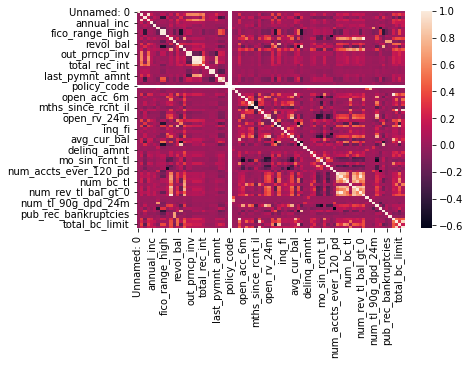

In [11]:
sns.heatmap(lending_df.corr());

In [19]:
from sklearn.model_selection import train_test_split
# X = train_df
X = numeric_df.drop(["loan_status_Fully Paid","loan_status_Late"], axis=1)

y = numeric_df["loan_status_Fully Paid"]

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# clf = AdaBoostClassifier(n_estimators=100)

# reg = Lasso(max_iter=1000).fit(X_train_scaled, y_train)
classifier.fit(X_train_scaled, y_train)
#random forest
#clf.fit(X_train_scaled, y_train)

#clf = RandomForestClassifier(random_state=42, n_estimators=50).fit(X_train_scaled, y_train)

#forest/adaboost
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

#logistic regression
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')


Training Score: 0.986855636971333
Testing Score: 0.9882375626687235


/Users/andrealynnbaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_test.value_counts()

1    5259
0    5113
Name: loan_status_Fully Paid, dtype: int64

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_true = y_test

y_pred = classifier.predict(X_test)

confusion_matrix(y_true, y_pred)

confusion_matrix(y_test, y_pred)

/Users/andrealynnbaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[3044, 2069],
       [   5, 5254]])

In [22]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred)


0.7971972237101146

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["Late","Fully Paid"]))

              precision    recall  f1-score   support

        Late       1.00      0.60      0.75      5113
  Fully Paid       0.72      1.00      0.84      5259

    accuracy                           0.80     10372
   macro avg       0.86      0.80      0.79     10372
weighted avg       0.86      0.80      0.79     10372



In [24]:
import pickle

model = LogisticRegression()
model.fit(X_train, y_train)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

/Users/andrealynnbaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
